# Connect Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# đường dẫn thư mục sẽ làm việc
WorkingPath ="/content/drive/MyDrive/TAI_LIEU_CUA_THAM/đồ án_DATA_ENGINEERING/"
%cd $WorkingPath

%pwd

/content/drive/MyDrive/TAI_LIEU_CUA_THAM/đồ án_DATA_ENGINEERING


'/content/drive/MyDrive/TAI_LIEU_CUA_THAM/đồ án_DATA_ENGINEERING'

# Import Libraries

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from wordcloud import WordCloud

# Data Frames

In [ ]:
#Importing Dataset
df = pd.read_excel("comments.xlsx", sheet_name='xử lý comment _lần 8')

# Inspect the first 5 rows and all columns of the dataset
df.head()

,Unnamed: 0,STT,phone_name,url,user_name,comment_text,đánh giá chung\nvề điện thoại,màu sắc,hình dáng,camera,cấu hình,sự mượt \ncủa máy,đồ bền \nrơi vỡ,pin,dây sạc,giá tiền,star_ratings,bought_at,recommendation,"5_tốt, 4_khá, 3_trung bình, 2_yếu, 1_kém"
0,1,1,iPhone 14 Pro Max 128GB,https://www.thegioididong.com/dtdd/iphone-14-p...,Lý Đức Nghĩa,"Mới sắm em này được 4 ngày , khỏi phải bàn về ...",5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5,Đã mua tại TGDD,NaN,NaN
1,2,2,iPhone 14 Pro Max 128GB,https://www.thegioididong.com/dtdd/iphone-14-p...,Nguyễn Ngọc Bùi,Good,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5,Đã mua tại DMX,"Sẽ giới thiệu cho bạn bè, người thân",NaN
2,3,3,iPhone 14 Pro Max 128GB,https://www.thegioididong.com/dtdd/iphone-14-p...,Tran Minh Man,ok sản phẩm,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5,Đã mua tại TGDD,"Sẽ giới thiệu cho bạn bè, người thân",NaN
3,4,5,iPhone 14 Pro Max 128GB,https://www.thegioididong.com/dtdd/iphone-14-p...,Nguyễn Thành Nam,Sản phẩm tốt,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5,Đã mua tại DMX,"Sẽ giới thiệu cho bạn bè, người thân",NaN
4,5,6,iPhone 14 Pro Max 128GB,https://www.thegioididong.com/dtdd/iphone-14-p...,Bui Viet Vu,Ok mà,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5,Đã mua tại TGDD,"Sẽ giới thiệu cho bạn bè, người thân",NaN


# <font color = "green">1. Biểu đồ word cloud</font>

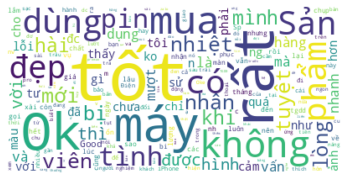

In [ ]:
#Creating the text variable
text2 = " ".join(title for title in df.comment_text)

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# <font color = "green">2. Biểu đồ bubble plot của cấu hình</font>

In [ ]:
df1 = df[['đánh giá chung\nvề điện thoại', 'cấu hình']]
df1 = df1.groupby(['đánh giá chung\nvề điện thoại', 'cấu hình'])['đánh giá chung\nvề điện thoại'].count().reset_index(name="Count")

# Create padding column from values for circles that are neither too small nor too large
df1["padd"] = 2.5 * (df1.Count - df1.Count.min()) / (df1.Count.max() - df1.Count.min()) + 0.5

# rename columns
df1 = df1.rename(columns={'đánh giá chung\nvề điện thoại': 'đánh_giá_chung',
                          'cấu hình': 'cấu_hình'})

# sắp xếp lại vị trí categorical trong cột
my_order = [1, 2, 3, 4, 5]

df1['đánh_giá_chung'] = pd.Categorical(df1['đánh_giá_chung'], categories=my_order, ordered=True)
df1.sort_values('đánh_giá_chung', inplace=True)
df1

,đánh_giá_chung,cấu_hình,Count,padd
0,1,1.0,2,0.506281
1,2,3.0,1,0.500000
2,3,2.0,2,0.506281
3,3,3.0,8,0.543970
4,4,4.0,4,0.518844
5,4,5.0,9,0.550251
6,5,5.0,399,3.000000


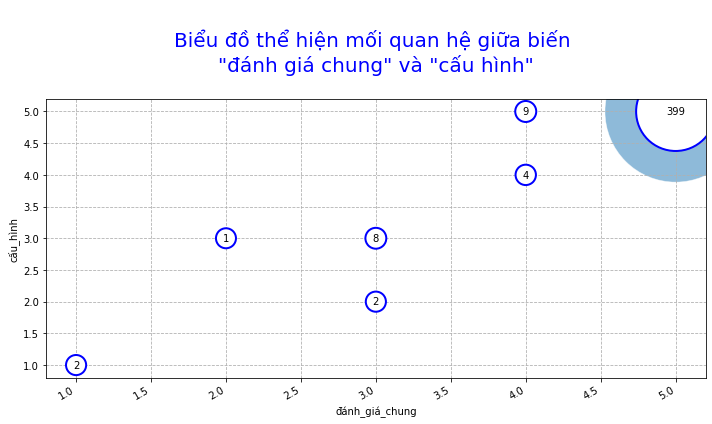

In [ ]:
fig = plt.figure(figsize=(10, 6))
# Prepare the axes for the plot - you can also order your categories at this step
s = sns.scatterplot(data=df1, x=df1['đánh_giá_chung'], 
                    y=df1['cấu_hình'], 
                    s=df1['Count']*50, alpha=0.5)
s.remove
# Plot data row-wise as text with circle radius according to Count
for row in df1.itertuples():
    bbox_props = dict(boxstyle = "circle, pad = {}".format(row.padd),
                      fc = "w", ec = "b", lw = 2)
    plt.annotate(str(row.Count), 
                 xy = (row.đánh_giá_chung, row.cấu_hình),
                 bbox = bbox_props, ha="center", va="center", zorder = 2,
                 clip_on = True)
 
# Plot grid behind markers
plt.grid(ls = "--", zorder = 1)
plt.title('\nBiểu đồ thể hiện mối quan hệ giữa biến \n"đánh giá chung" và "cấu hình"\n', fontsize=20, color='blue')
 
# Take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# <font color = "green">3. Biểu đồ bubble plot của hình dáng</font>

In [15]:
df2 = df[['đánh giá chung\nvề điện thoại', 'hình dáng']]
df2 = df2.groupby(['đánh giá chung\nvề điện thoại', 'hình dáng'])['đánh giá chung\nvề điện thoại'].count().reset_index(name="Count")

# Create padding column from values for circles that are neither too small nor too large
df2["padd"] = 2.5 * (df2.Count - df2.Count.min()) / (df2.Count.max() - df2.Count.min()) + 0.5

# rename columns
df2 = df2.rename(columns={'đánh giá chung\nvề điện thoại': 'đánh_giá_chung',
                          'hình dáng': 'hình_dáng'})

# sắp xếp lại vị trí categorical trong cột
my_order = [1, 2, 3, 4, 5]

df2['đánh_giá_chung'] = pd.Categorical(df2['đánh_giá_chung'], categories=my_order, ordered=True)
df2.sort_values('đánh_giá_chung', inplace=True)
df2

,đánh_giá_chung,hình_dáng,Count,padd
0,2,3.0,1,0.500000
1,3,2.0,1,0.500000
2,3,3.0,8,0.543970
3,4,4.0,5,0.525126
4,4,5.0,8,0.543970
5,5,5.0,399,3.000000


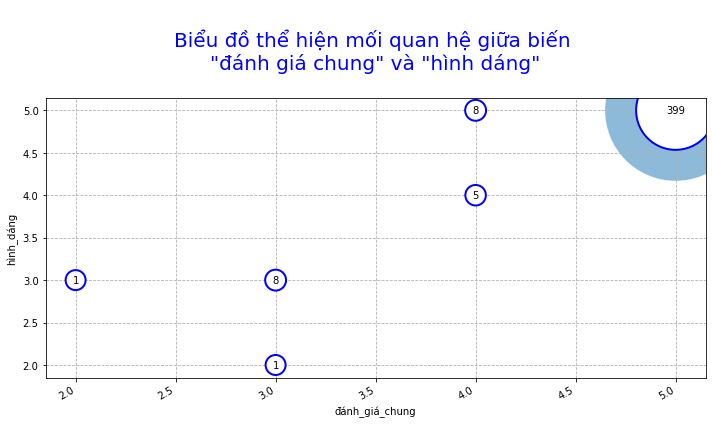

In [16]:
fig = plt.figure(figsize=(10, 6))
# Prepare the axes for the plot - you can also order your categories at this step
s = sns.scatterplot(data=df2, x=df2['đánh_giá_chung'], 
                    y=df2['hình_dáng'], 
                    s=df2['Count']*50, alpha=0.5)
s.remove
# Plot data row-wise as text with circle radius according to Count
for row in df2.itertuples():
    bbox_props = dict(boxstyle = "circle, pad = {}".format(row.padd),
                      fc = "w", ec = "b", lw = 2)
    plt.annotate(str(row.Count), 
                 xy = (row.đánh_giá_chung, row.hình_dáng),
                 bbox = bbox_props, ha="center", va="center", zorder = 2,
                 clip_on = True)
 
# Plot grid behind markers
plt.grid(ls = "--", zorder = 1)
plt.title('\nBiểu đồ thể hiện mối quan hệ giữa biến \n"đánh giá chung" và "hình dáng"\n', fontsize=20, color='blue')
 
# Take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# <font color = "green">4. Biểu đồ bubble plot của màu sắc</font>

In [18]:
df2 = df[['đánh giá chung\nvề điện thoại', 'màu sắc']]
df2 = df2.groupby(['đánh giá chung\nvề điện thoại', 'màu sắc'])['đánh giá chung\nvề điện thoại'].count().reset_index(name="Count")

# Create padding column from values for circles that are neither too small nor too large
df2["padd"] = 2.5 * (df2.Count - df2.Count.min()) / (df2.Count.max() - df2.Count.min()) + 0.5

# rename columns
df2 = df2.rename(columns={'đánh giá chung\nvề điện thoại': 'đánh_giá_chung',
                          'màu sắc': 'màu_sắc'})

# sắp xếp lại vị trí categorical trong cột
my_order = [1, 2, 3, 4, 5]

df2['đánh_giá_chung'] = pd.Categorical(df2['đánh_giá_chung'], categories=my_order, ordered=True)
df2.sort_values('đánh_giá_chung', inplace=True)
df2

,đánh_giá_chung,màu_sắc,Count,padd
0,1,1.0,1,0.500000
1,2,3.0,1,0.500000
2,3,2.0,1,0.500000
3,3,3.0,8,0.544081
4,4,4.0,4,0.518892
5,4,5.0,9,0.550378
6,5,4.0,1,0.500000
7,5,5.0,398,3.000000


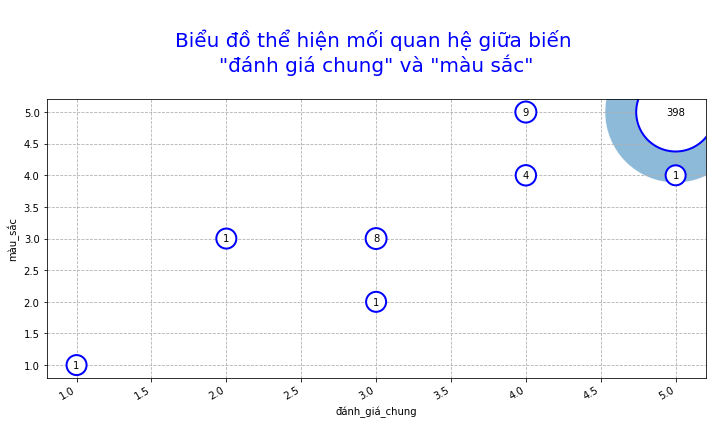

In [19]:
fig = plt.figure(figsize=(10, 6))
# Prepare the axes for the plot - you can also order your categories at this step
s = sns.scatterplot(data=df2, x=df2['đánh_giá_chung'], 
                    y=df2['màu_sắc'], 
                    s=df2['Count']*50, alpha=0.5)
s.remove
# Plot data row-wise as text with circle radius according to Count
for row in df2.itertuples():
    bbox_props = dict(boxstyle = "circle, pad = {}".format(row.padd),
                      fc = "w", ec = "b", lw = 2)
    plt.annotate(str(row.Count), 
                 xy = (row.đánh_giá_chung, row.màu_sắc),
                 bbox = bbox_props, ha="center", va="center", zorder = 2,
                 clip_on = True)
 
# Plot grid behind markers
plt.grid(ls = "--", zorder = 1)
plt.title('\nBiểu đồ thể hiện mối quan hệ giữa biến \n"đánh giá chung" và "màu sắc"\n', fontsize=20, color='blue')
 
# Take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# <font color = "green">5. Biểu đồ bubble plot của camera</font>

In [21]:
df2 = df[['đánh giá chung\nvề điện thoại', 'camera']]
df2 = df2.groupby(['đánh giá chung\nvề điện thoại', 'camera'])['đánh giá chung\nvề điện thoại'].count().reset_index(name="Count")

# Create padding column from values for circles that are neither too small nor too large
df2["padd"] = 2.5 * (df2.Count - df2.Count.min()) / (df2.Count.max() - df2.Count.min()) + 0.5

# rename columns
df2 = df2.rename(columns={'đánh giá chung\nvề điện thoại': 'đánh_giá_chung'})

# sắp xếp lại vị trí categorical trong cột
my_order = [1, 2, 3, 4, 5]

df2['đánh_giá_chung'] = pd.Categorical(df2['đánh_giá_chung'], categories=my_order, ordered=True)
df2.sort_values('đánh_giá_chung', inplace=True)
df2

,đánh_giá_chung,camera,Count,padd
0,1,1.0,1,0.500000
1,1,3.0,1,0.500000
2,2,2.0,2,0.506281
3,3,2.0,4,0.518844
4,3,3.0,8,0.543970
5,4,4.0,3,0.512563
6,4,5.0,10,0.556533
7,5,5.0,399,3.000000


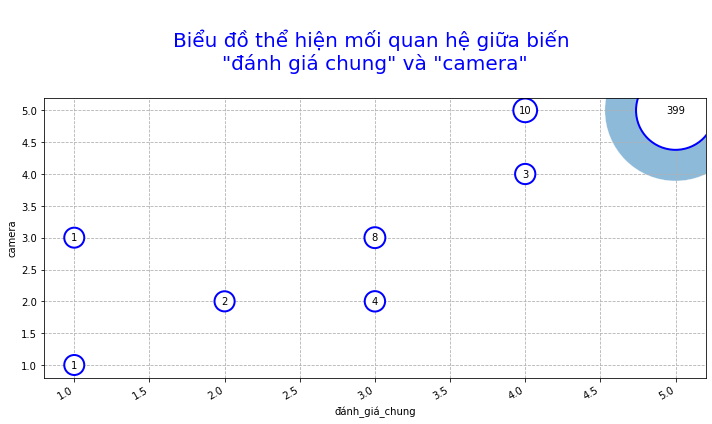

In [22]:
fig = plt.figure(figsize=(10, 6))
# Prepare the axes for the plot - you can also order your categories at this step
s = sns.scatterplot(data=df2, x=df2['đánh_giá_chung'], 
                    y=df2['camera'], 
                    s=df2['Count']*50, alpha=0.5)
s.remove
# Plot data row-wise as text with circle radius according to Count
for row in df2.itertuples():
    bbox_props = dict(boxstyle = "circle, pad = {}".format(row.padd),
                      fc = "w", ec = "b", lw = 2)
    plt.annotate(str(row.Count), 
                 xy = (row.đánh_giá_chung, row.camera),
                 bbox = bbox_props, ha="center", va="center", zorder = 2,
                 clip_on = True)
 
# Plot grid behind markers
plt.grid(ls = "--", zorder = 1)
plt.title('\nBiểu đồ thể hiện mối quan hệ giữa biến \n"đánh giá chung" và "camera"\n', fontsize=20, color='blue')
 
# Take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# <font color = "green">6. Biểu đồ bubble plot của sự mượt của máy</font>

In [23]:
df1 = df[['đánh giá chung\nvề điện thoại', 'sự mượt \ncủa máy']]
df1 = df1.groupby(['đánh giá chung\nvề điện thoại', 'sự mượt \ncủa máy'])['đánh giá chung\nvề điện thoại'].count().reset_index(name="Count")

# Create padding column from values for circles that are neither too small nor too large
df1["padd"] = 2.5 * (df1.Count - df1.Count.min()) / (df1.Count.max() - df1.Count.min()) + 0.5

# rename columns
df1 = df1.rename(columns={'đánh giá chung\nvề điện thoại': 'đánh_giá_chung',
                          'sự mượt \ncủa máy': 'sự_mượt_của_máy'})

# sắp xếp lại vị trí categorical trong cột
my_order = [1, 2, 3, 4, 5]

df1['đánh_giá_chung'] = pd.Categorical(df1['đánh_giá_chung'], categories=my_order, ordered=True)
df1.sort_values('đánh_giá_chung', inplace=True)
df1

,đánh_giá_chung,sự_mượt_của_máy,Count,padd
0,1,1.0,1,0.500000
1,2,1.0,4,0.518844
2,2,2.0,2,0.506281
3,3,2.0,6,0.531407
4,3,3.0,8,0.543970
5,4,4.0,5,0.525126
6,4,5.0,8,0.543970
7,5,5.0,399,3.000000


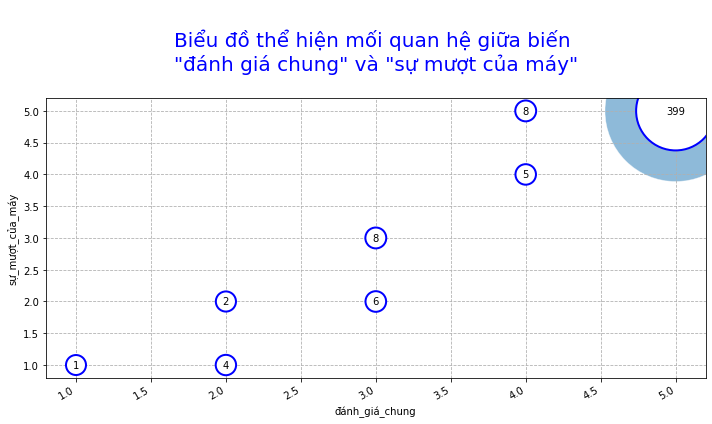

In [24]:
fig = plt.figure(figsize=(10, 6))
# Prepare the axes for the plot - you can also order your categories at this step
s = sns.scatterplot(data=df1, x=df1['đánh_giá_chung'], 
                    y=df1['sự_mượt_của_máy'], 
                    s=df1['Count']*50, alpha=0.5)
s.remove
# Plot data row-wise as text with circle radius according to Count
for row in df1.itertuples():
    bbox_props = dict(boxstyle = "circle, pad = {}".format(row.padd),
                      fc = "w", ec = "b", lw = 2)
    plt.annotate(str(row.Count), 
                 xy = (row.đánh_giá_chung, row.sự_mượt_của_máy),
                 bbox = bbox_props, ha="center", va="center", zorder = 2,
                 clip_on = True)
 
# Plot grid behind markers
plt.grid(ls = "--", zorder = 1)
plt.title('\nBiểu đồ thể hiện mối quan hệ giữa biến \n"đánh giá chung" và "sự mượt của máy"\n', fontsize=20, color='blue')
 
# Take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.show()